In [73]:
%matplotlib inline  
from struct import unpack
from numpy import zeros, uint8, float32
from pylab import imshow, show, cm
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

#Initialize for keras
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [106]:
# Define functions for reading data.
# Based on https://gist.github.com/tylerneylon/
def read_idx(filename):
    """
        Read from file and create numpy array
    """
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.fromstring(f.read(), dtype=np.uint8).reshape(shape)

def get_data(image_file, label_file, num_classes = 10):
    """
        Read the image and label data
    """
    # Read the files
    pre_images = read_idx(image_file)
    pre_labels = read_idx(label_file)
    
    images = np.zeros((len(pre_images), 28,28, 1), dtype=np.float32)
    labels = np.zeros((len(pre_labels),num_classes), dtype=np.int8)
    for i in range(len(pre_images)):
        pre_img=pre_images[i]
        pre_label=pre_labels[i]
        img = (pre_img.transpose() / 255.0) - 0.5
        images[i] = img.reshape(28,28,1) 
        labels[i] = keras.utils.to_categorical(pre_label, num_classes)
    
    return images, labels


In [107]:
image_file = '/Users/rparundekar/dataspace/EMNIST/mnist/emnist-mnist-train-images-idx3-ubyte'
label_file = '/Users/rparundekar/dataspace/EMNIST/mnist/emnist-mnist-train-labels-idx1-ubyte'

images, labels = get_data(image_file, label_file)
print ('Images Shape: {}'.format(images.shape))
print ('Labels Shape: {}'.format(labels.shape))

Images Shape: (60000, 28, 28, 1)
Labels Shape: (60000, 10)


Label - 4 : [0 0 0 0 1 0 0 0 0 0] 


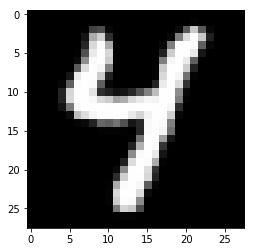

Label - 1 : [0 1 0 0 0 0 0 0 0 0] 


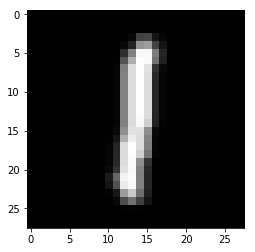

Label - 4 : [0 0 0 0 1 0 0 0 0 0] 


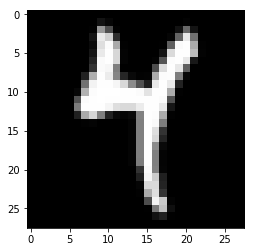

Label - 1 : [0 1 0 0 0 0 0 0 0 0] 


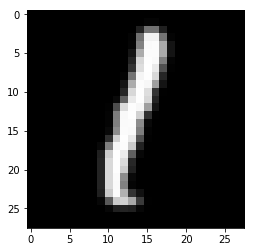

Label - 6 : [0 0 0 0 0 0 1 0 0 0] 


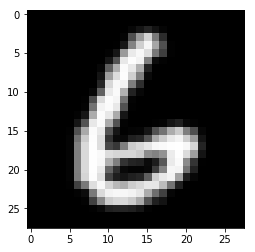

In [108]:
def view_image(image, label=""):
    """View a single image."""
    print("Label - {} : {} ".format(np.argmax(label), label))
    plt.imshow((image.reshape(28,28)+0.5), cmap="gray")
    plt.show()

for i in range(5):
    view_image(images[i], labels[i])

In [95]:
# Train, Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [111]:
# Initialize the hyperparameters
batch_size = 128
input_shape = (28,28, 1)

In [131]:
# Build model
model = Sequential()
model.add(Conv2D(16, kernel_size=(7, 7), strides=(1,1),
                 kernel_initializer='glorot_normal', activation='relu', 
                 input_shape=input_shape))
model.add(Dropout(0.2))
model.add(Conv2D(16, kernel_size=(2, 2), strides=(2,2), kernel_initializer='glorot_normal', activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1,1), kernel_initializer='glorot_normal', activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(32, kernel_size=(2, 2), strides=(2,2), kernel_initializer='glorot_normal', activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(64, kernel_size=(3, 3), strides=(1,1), kernel_initializer='glorot_normal', activation='relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Nadam(),
              metrics=['accuracy'])

In [132]:
epochs = 5
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 45s - loss: 0.4387 - acc: 0.8617 - val_loss: 0.0948 - val_acc: 0.9709
Epoch 2/5
48000/48000 [==============================] - 46s - loss: 0.1346 - acc: 0.9626 - val_loss: 0.0716 - val_acc: 0.9792
Epoch 3/5
48000/48000 [==============================] - 46s - loss: 0.0999 - acc: 0.9715 - val_loss: 0.0540 - val_acc: 0.9851
Epoch 4/5
48000/48000 [==============================] - 42s - loss: 0.0856 - acc: 0.9761 - val_loss: 0.0504 - val_acc: 0.9862
Epoch 5/5
48000/48000 [==============================] - 41s - loss: 0.0795 - acc: 0.9774 - val_loss: 0.0497 - val_acc: 0.9870


In [133]:
score = model.evaluate(X_test, y_test, verbose=1, batch_size=batch_size)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

11904/12000 [============================>.] - ETA: 0sTest loss: 0.0496510801688
Test accuracy: 0.987000000159
